### Supervised Learning - Regression 
### Implementation of Linear Regression

In [15]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Medical Price Dataset.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.info
# There are total 1338 data rows given and 7 features out of which charges can be considered as target feature

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

#### Data Preprocessing and Visualization

In [19]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

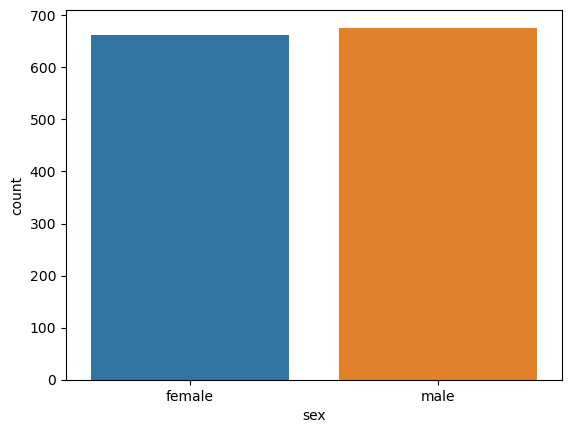

In [23]:
sns.countplot(x='sex', data =  df)
# We can see that data is almost equally given for male and female

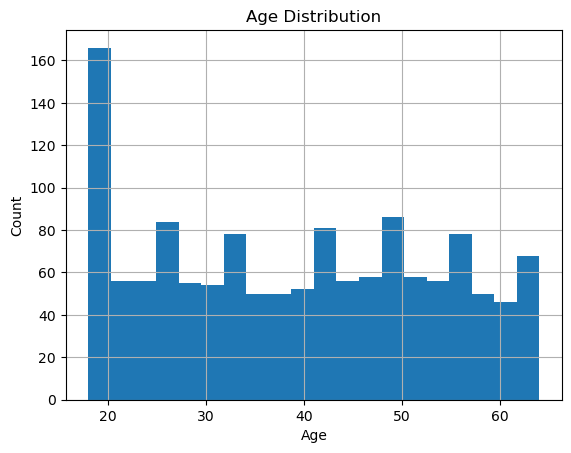

In [40]:
df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
# The dataset majorly have data of person who is less than 20 and others don't vary much

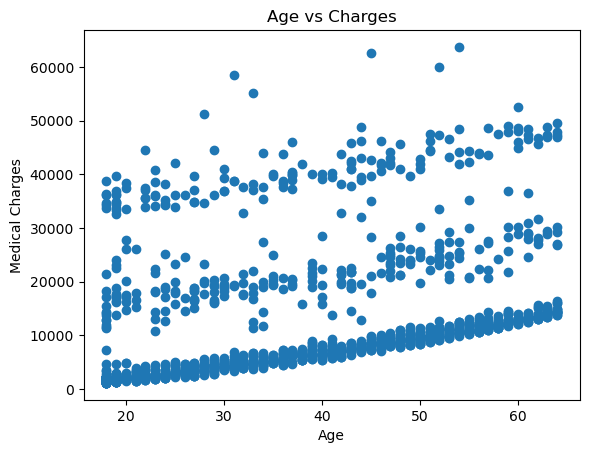

In [46]:
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.title("Age vs Charges")
plt.show()

In [58]:
df.isnull().sum()
# Data contains no null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
# Encoding sex and smoker columns to integer value from string using LabelEncoder
le = LabelEncoder()

In [64]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [66]:
df.head()
# Female is mapped to 0, 
# Male is mapped to 1, 
# Smoker is mapped to 1, 
# non-smoker is mapped to 0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


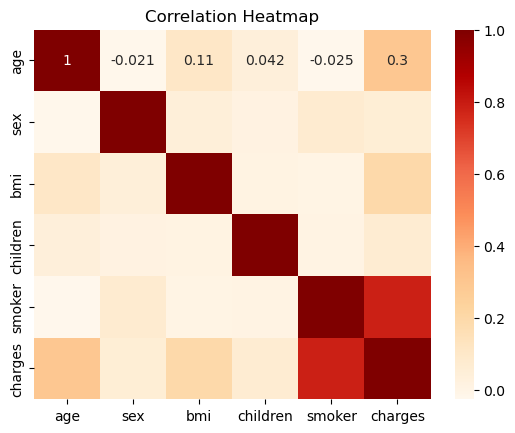

In [74]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='OrRd')
plt.title("Correlation Heatmap")
plt.show()
# This plot shows correlation between each feature, darker the shade between features more they are correlated with each other

In [78]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df[['charges']]
# Seperated Dependent and Independent Variables, Here we have to predict charges based on data given 

In [92]:
from sklearn.model_selection import train_test_split as tts

In [94]:
X_train, X_test, Y_train, Y_test = tts(x, y, test_size=0.2, random_state=42)

#### Linear Regression using Normal Equation & Gradient Descent

In [131]:
# Linear regression using Normal Equation
def linear_regression(x_train, y_train):
    # Convert to numpy arrays if using pandas
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, pd.Series):
        y_train = y_train.values

    # Add intercept term (column of 1's)
    ones = np.ones((x_train.shape[0], 1))
    X_b = np.hstack((ones, x_train))  # shape: (n_samples, n_features + 1)

    # Compute coefficients using normal equation
    # b = (X^T X)^(-1) X^T y
    XtX = np.dot(X_b.T, X_b)
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.dot(X_b.T, y_train)
    b = np.dot(XtX_inv, XtY)

    # Return intercept and coefficients separately
    intercept = b[0]
    coefficients = b[1:]
    return intercept, coefficients

# Prediction function
def predict(x, intercept, coefficients):
    if isinstance(x, pd.DataFrame):
        x = x.values
    return intercept + np.dot(x, coefficients)

# Evaluation metric
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Gradient descent
def linear_regression_gd(x_train, y_train, learning_rate=0.01, epochs=1000):
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.values
    if isinstance(y_train, (pd.Series, pd.DataFrame)):
        y_train = y_train.values.reshape(-1, 1)  # Safe reshape

    m, n = x_train.shape

    # Add intercept column
    X_b = np.hstack((np.ones((m, 1)), x_train))  # shape: (m, n+1)

    # Initialize weights
    theta = np.zeros((n + 1, 1))

    # Gradient Descent Loop
    for _ in range(epochs):
        gradients = (2 / m) * X_b.T @ (X_b @ theta - y_train)
        theta = theta - learning_rate * gradients

    intercept = theta[0][0]
    coefficients = theta[1:].flatten()
    return intercept, coefficients


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [135]:
# Training using Normal Equation
intercept_ne, coeffs_ne = linear_regression(X_train, Y_train)
y_pred_ne = predict(X_test, intercept_ne, coeffs_ne)
print("Normal Equation:")
print("R²:", r2_score(Y_test, y_pred_ne))
print("MAE:", mean_absolute_error(Y_test, y_pred_ne))
print("MSE:", mean_squared_error(Y_test, y_pred_ne))


# Standardization of features (only x, not y)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure Y_test is a 1D numpy array
if isinstance(Y_test, (pd.Series, pd.DataFrame)):
    Y_test_np = Y_test.values.flatten()
else:
    Y_test_np = Y_test

# Ensure prediction is a numpy array
y_pred = np.array(y_pred).flatten()

# Training using Gradient Descent
intercept_gd, coeffs_gd = linear_regression_gd(X_train_scaled, Y_train, learning_rate=0.01, epochs=5000)
y_pred_gd = predict(X_test_scaled, intercept_gd, coeffs_gd)

Y_test_np = Y_test.values.flatten()
y_pred_gd = np.array(y_pred_gd).flatten()

print("\nGradient Descent:")
print("R²:", r2_score(Y_test_np, y_pred_gd))
print("MAE:", mean_absolute_error(Y_test_np, y_pred_gd))
print("MSE:", mean_squared_error(Y_test_np, y_pred_gd))



Normal Equation:
R²: charges    0.78113
dtype: float64
MAE: 4213.484797807157
MSE: 33979257.05080825

Gradient Descent:
R²: 0.7811302113434095
MAE: 4213.484797807139
MSE: 33979257.05080823


C:\Users\hetp1\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


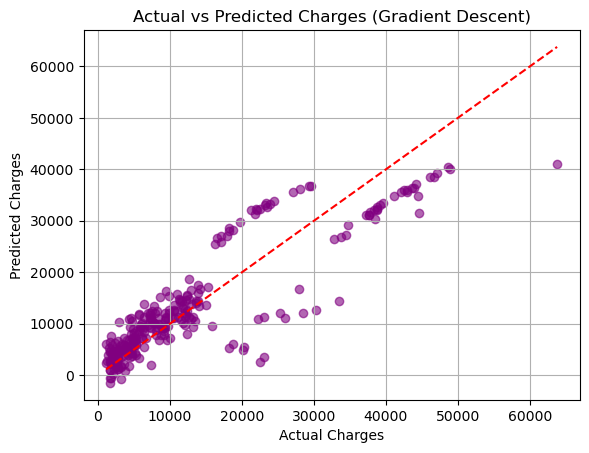

In [139]:

plt.scatter(Y_test_np, y_pred_gd, alpha=0.6, color='purple')
plt.plot([Y_test_np.min(), Y_test_np.max()], [Y_test_np.min(), Y_test_np.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Gradient Descent)")
plt.grid(True)
plt.show()
